In [1]:
import pandas as pd

crime_data = pd.read_csv('Compiled_Data.csv', encoding='utf-8')
crime_data.drop('Unnamed: 0', axis=1,inplace=True)
crime_data.head()

lng      lat                       crime           barangay  \
0  125.808  7.44808  Vehicular Traffic Accident  Magugpo Poblacion   
1  125.803  7.44675                      MURDER  Magugpo Poblacion   
2  125.803  7.44897           PHYSICAL INJURIES  Magugpo Poblacion   
3  125.818  7.45982                      MURDER      Magugpo North   
4  125.818  7.46016           PHYSICAL INJURIES      Magugpo North   

         city             modus        time_epoch     day Weather  \
0  Tagum City     Not Indicated  After Work-Hours  Sunday   Clear   
1  Tagum City  Stabbing/Hacking    After Midnight  Sunday  Cloudy   
2  Tagum City  Stabbing/Hacking    After Midnight  Sunday  Cloudy   
3  Tagum City          Shooting           Evening  Sunday  Cloudy   
4  Tagum City          Shooting           Evening  Sunday  Cloudy   

   Temp (deg celsius)         ...          \
0                30.0         ...           
1                23.0         ...           
2                23.0         ...           
3                27.0         ...           
4                27.0         ...           

   Poverty,poverty incidence by population  \
0                                    718.5   
1                                    718.5   
2                                    718.5   
3                                   2122.5   
4                                   2122.5   

   Poverty,poverty incidence by unemployed  Consumer Price Index  - all items  \
0                                     13.0                              159.2   
1                                     13.0                              159.2   
2                                     13.0                              159.2   
3                                     38.5                              159.2   
4                                     38.5                              159.2   

   Consumer Price Index -Alcoholic beverages and tobacco  \
0                                              183.6       
1                                              183.6       
2                                              183.6       
3                                              183.6       
4                                              183.6       

   Consumer Price Index -transport  \
0                            140.2   
1                            140.2   
2                            140.2   
3                            140.2   
4                            140.2   

   Consumer Price Index -Housing, water, electricity, gas, and other fuels  \
0                                              143.6                         
1                                              143.6                         
2                                              143.6                         
3                                              143.6                         
4                                              143.6                         

  Consumer Price Index -Restaurant and miscellaneous goods and services  \
0                                              137.4                      
1                                              137.4                      
2                                              137.4                      
3                                              137.4                      
4                                              137.4                      

   inflation rate  savings deposit interest rate  bank lending rates  
0             2.2                          0.707               5.673  
1             2.2                          0.707               5.673  
2             2.2                          0.707               5.673  
3             2.2                          0.707               5.673  
4             2.2                          0.707               5.673  

[5 rows x 166 columns]

In [2]:
cols = ['Bank',
'Bar',
'Beach',
'Bridge',
'Cemetery',
'Church',
'Clinic',
'Commercial Building',
'Community Center',
'Convenience Store',
'Fire Station',
'Gas Station',
'Government Office',
'Greenfield',
'Highway',
'Highway Pedestrian',
'Highway Primary',
'Highway Residential',
'Highway Secondary',
'Highway Tertiary',
'Hospital',
'Hotel',
'Industrial Building',
'Mall',
'Marketplace',
'Park',
'Parking Area',
'Pawnshop',
'Pharmacy',
'Police Station',
'Post Office',
'Private Office',
'Recreational Area',
'Residential Building',
'Restaurant',
'Road',
'School',
'Sports Center',
'Tourist Attraction',
'Transport Terminal']

In [3]:
#one-hot encoding place
import numpy as np
for index,row in crime_data[cols].iterrows():
    for col in cols:
        if crime_data.loc[index,col] >= 0 and crime_data.loc[index,col] <= 200:
            crime_data.at[index,col] = 1
        else:
            crime_data.at[index,col] = 0
crime_data[cols] = crime_data[cols].astype(np.uint8)
crime_data[cols].head()

Bank  Bar  Beach  Bridge  Cemetery  Church  Clinic  Commercial Building  \
0     1    0      0       0         0       1       1                    1   
1     1    1      0       0         0       1       0                    1   
2     1    0      0       0         0       0       0                    1   
3     0    0      0       0         0       1       0                    0   
4     0    0      0       0         0       1       0                    0   

   Community Center  Convenience Store         ...          Post Office  \
0                 1                  0         ...                    0   
1                 0                  1         ...                    0   
2                 1                  0         ...                    1   
3                 0                  0         ...                    0   
4                 0                  0         ...                    0   

   Private Office  Recreational Area  Residential Building  Restaurant  Road  \
0               0                  0                     0           1     0   
1               1                  0                     0           1     0   
2               1                  1                     0           1     0   
3               0                  0                     0           1     0   
4               0                  0                     0           1     0   

   School  Sports Center  Tourist Attraction  Transport Terminal  
0       0              0                   0                   0  
1       1              0                   0                   0  
2       1              0                   1                   0  
3       1              0                   0                   0  
4       1              0                   0                   0  

[5 rows x 40 columns]

In [4]:
#one hot encoding categorical variables
string_columns_independent_var = [
    'time_epoch',
    'day',
    'Weather',
    'day_night',
    'placetype'
]

In [5]:
crime_data = pd.get_dummies(crime_data, columns=string_columns_independent_var)

In [6]:
print(len(crime_data.columns))
for col in crime_data.columns:
    print("'{}',".format(col))

181
'lng',
'lat',
'crime',
'barangay',
'city',
'modus',
'Temp (deg celsius)',
'Feels Like (deg celsius)',
'Wind (km/h)',
'Cloud',
'Humidity',
'Precip (mm)',
'Pressure (mb)',
'Bank',
'Bar',
'Beach',
'Bridge',
'Cemetery',
'Church',
'Clinic',
'Commercial Building',
'Community Center',
'Convenience Store',
'Fire Station',
'Gas Station',
'Government Office',
'Greenfield',
'Highway',
'Highway Pedestrian',
'Highway Primary',
'Highway Residential',
'Highway Secondary',
'Highway Tertiary',
'Hospital',
'Hotel',
'Industrial Building',
'Mall',
'Marketplace',
'Park',
'Parking Area',
'Pawnshop',
'Pharmacy',
'Police Station',
'Post Office',
'Private Office',
'Recreational Area',
'Residential Building',
'Restaurant',
'Road',
'School',
'Sports Center',
'Tourist Attraction',
'Transport Terminal',
'php-usd-rate',
'PSE-index-Close',
'year',
'month_num',
'land area sq km',
'Education,Baccalauate graduate',
'Education,College undergraduate',
'Education,Elementary',
'Education,High school',
'Education,No gra

In [7]:
for col in crime_data.columns:
    print(col)

lng
lat
crime
barangay
city
modus
Temp (deg celsius)
Feels Like (deg celsius)
Wind (km/h)
Cloud
Humidity
Precip (mm)
Pressure (mb)
Bank
Bar
Beach
Bridge
Cemetery
Church
Clinic
Commercial Building
Community Center
Convenience Store
Fire Station
Gas Station
Government Office
Greenfield
Highway
Highway Pedestrian
Highway Primary
Highway Residential
Highway Secondary
Highway Tertiary
Hospital
Hotel
Industrial Building
Mall
Marketplace
Park
Parking Area
Pawnshop
Pharmacy
Police Station
Post Office
Private Office
Recreational Area
Residential Building
Restaurant
Road
School
Sports Center
Tourist Attraction
Transport Terminal
php-usd-rate
PSE-index-Close
year
month_num
land area sq km
Education,Baccalauate graduate
Education,College undergraduate
Education,Elementary
Education,High school
Education,No grade completed
Education,Out of school youth
Education,Post baccalaureate
Education,Postsecondary
Household,number of households
Household,total annual household expenditure
Household,total ann

In [8]:
print(len(crime_data.columns))
for col in crime_data.columns:
    print("{} --- {}".format(type(crime_data[col][0]),col))

181
<class 'numpy.float64'> --- lng
<class 'numpy.float64'> --- lat
<class 'str'> --- crime
<class 'str'> --- barangay
<class 'str'> --- city
<class 'str'> --- modus
<class 'numpy.float64'> --- Temp (deg celsius)
<class 'numpy.float64'> --- Feels Like (deg celsius)
<class 'numpy.float64'> --- Wind (km/h)
<class 'numpy.float64'> --- Cloud
<class 'numpy.float64'> --- Humidity
<class 'numpy.float64'> --- Precip (mm)
<class 'numpy.float64'> --- Pressure (mb)
<class 'numpy.uint8'> --- Bank
<class 'numpy.uint8'> --- Bar
<class 'numpy.uint8'> --- Beach
<class 'numpy.uint8'> --- Bridge
<class 'numpy.uint8'> --- Cemetery
<class 'numpy.uint8'> --- Church
<class 'numpy.uint8'> --- Clinic
<class 'numpy.uint8'> --- Commercial Building
<class 'numpy.uint8'> --- Community Center
<class 'numpy.uint8'> --- Convenience Store
<class 'numpy.uint8'> --- Fire Station
<class 'numpy.uint8'> --- Gas Station
<class 'numpy.uint8'> --- Government Office
<class 'numpy.uint8'> --- Greenfield
<class 'numpy.uint8'> -

In [9]:
#label dependent variable
crime_data['crime'] = crime_data['crime'].astype('category')
crime_data['crime_label'] = crime_data['crime'].cat.codes
crime_data.head()

lng      lat                       crime           barangay  \
0  125.808  7.44808  Vehicular Traffic Accident  Magugpo Poblacion   
1  125.803  7.44675                      MURDER  Magugpo Poblacion   
2  125.803  7.44897           PHYSICAL INJURIES  Magugpo Poblacion   
3  125.818  7.45982                      MURDER      Magugpo North   
4  125.818  7.46016           PHYSICAL INJURIES      Magugpo North   

         city             modus  Temp (deg celsius)  Feels Like (deg celsius)  \
0  Tagum City     Not Indicated                30.0                      32.0   
1  Tagum City  Stabbing/Hacking                23.0                      25.0   
2  Tagum City  Stabbing/Hacking                23.0                      25.0   
3  Tagum City          Shooting                27.0                      29.0   
4  Tagum City          Shooting                27.0                      29.0   

   Wind (km/h)  Cloud     ...       day_Tuesday  day_Wednesday  Weather_Clear  \
0         15.0   57.0     ...                 0              0              1   
1          8.0   18.0     ...                 0              0              0   
2          8.0   18.0     ...                 0              0              0   
3         13.0    1.0     ...                 0              0              0   
4         13.0    1.0     ...                 0              0              0   

   Weather_Cloudy  Weather_Rainy  day_night_daylight  day_night_nighttime  \
0               0              0                   1                    0   
1               1              0                   0                    1   
2               1              0                   0                    1   
3               1              0                   0                    1   
4               1              0                   0                    1   

   placetype_rural  placetype_urban  crime_label  
0                0                1            8  
1                0                1            3  
2                0                1            4  
3                0                1            3  
4                0                1            4  

[5 rows x 182 columns]

In [10]:
crime_dict = dict(zip(crime_data['crime_label'].unique(), crime_data['crime'].unique()))
crime_dict

{8: 'Vehicular Traffic Accident',
 3: 'MURDER',
 4: 'PHYSICAL INJURIES',
 1: 'Drug Related Incident (RA 9165)',
 7: 'THEFT',
 0: 'ANTI-CARNAPPING ACT (R.A. 6539) MC',
 5: 'RAPE (Art. 266-A RC & R.A.8353)',
 6: 'ROBBERY',
 2: 'HOMICIDE'}

In [11]:
sorted(crime_dict.values())
crime_names = []
x=0
while x < len(crime_dict):
    print(crime_dict[x])
    crime_names.append(crime_dict[x])
    x+=1

ANTI-CARNAPPING ACT (R.A. 6539) MC
Drug Related Incident (RA 9165)
HOMICIDE
MURDER
PHYSICAL INJURIES
RAPE (Art. 266-A RC & R.A.8353)
ROBBERY
THEFT
Vehicular Traffic Accident


In [12]:
crime_data['modus'] = crime_data['modus'].astype('category')
crime_data['modus_label'] = crime_data['modus'].cat.codes
crime_data.head()

lng      lat                       crime           barangay  \
0  125.808  7.44808  Vehicular Traffic Accident  Magugpo Poblacion   
1  125.803  7.44675                      MURDER  Magugpo Poblacion   
2  125.803  7.44897           PHYSICAL INJURIES  Magugpo Poblacion   
3  125.818  7.45982                      MURDER      Magugpo North   
4  125.818  7.46016           PHYSICAL INJURIES      Magugpo North   

         city             modus  Temp (deg celsius)  Feels Like (deg celsius)  \
0  Tagum City     Not Indicated                30.0                      32.0   
1  Tagum City  Stabbing/Hacking                23.0                      25.0   
2  Tagum City  Stabbing/Hacking                23.0                      25.0   
3  Tagum City          Shooting                27.0                      29.0   
4  Tagum City          Shooting                27.0                      29.0   

   Wind (km/h)  Cloud     ...       day_Wednesday  Weather_Clear  \
0         15.0   57.0     ...                   0              1   
1          8.0   18.0     ...                   0              0   
2          8.0   18.0     ...                   0              0   
3         13.0    1.0     ...                   0              0   
4         13.0    1.0     ...                   0              0   

   Weather_Cloudy  Weather_Rainy  day_night_daylight  day_night_nighttime  \
0               0              0                   1                    0   
1               1              0                   0                    1   
2               1              0                   0                    1   
3               1              0                   0                    1   
4               1              0                   0                    1   

   placetype_rural  placetype_urban  crime_label  modus_label  
0                0                1            8           28  
1                0                1            3           42  
2                0                1            4           42  
3                0                1            3           39  
4                0                1            4           39  

[5 rows x 183 columns]

In [13]:
#remove places outliers
# outliers = ['Bar',
#  'Beach',
#  'Bridge',
#  'Cemetery',
#  'Clinic',
#  'Fire Station',
#  'Government Office',
#  'Industrial Building',
#  'Parking Area',
#  'Pawnshop',
#  'Police Station',
#  'Post Office',
#  'Private Office',
#  'Recreational Area',
#  'Road',
#  'Sports Center',
#  'Tourist Attraction',
#  'Transport Terminal']
# crime_data.drop(labels=outliers,axis=1,inplace=True)

In [14]:
crime_data.to_csv('Normalized.csv')

# Modeling

In [15]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

crime = crime_data.copy()
crime.head()

lng      lat                       crime           barangay  \
0  125.808  7.44808  Vehicular Traffic Accident  Magugpo Poblacion   
1  125.803  7.44675                      MURDER  Magugpo Poblacion   
2  125.803  7.44897           PHYSICAL INJURIES  Magugpo Poblacion   
3  125.818  7.45982                      MURDER      Magugpo North   
4  125.818  7.46016           PHYSICAL INJURIES      Magugpo North   

         city             modus  Temp (deg celsius)  Feels Like (deg celsius)  \
0  Tagum City     Not Indicated                30.0                      32.0   
1  Tagum City  Stabbing/Hacking                23.0                      25.0   
2  Tagum City  Stabbing/Hacking                23.0                      25.0   
3  Tagum City          Shooting                27.0                      29.0   
4  Tagum City          Shooting                27.0                      29.0   

   Wind (km/h)  Cloud     ...       day_Wednesday  Weather_Clear  \
0         15.0   57.0     ...                   0              1   
1          8.0   18.0     ...                   0              0   
2          8.0   18.0     ...                   0              0   
3         13.0    1.0     ...                   0              0   
4         13.0    1.0     ...                   0              0   

   Weather_Cloudy  Weather_Rainy  day_night_daylight  day_night_nighttime  \
0               0              0                   1                    0   
1               1              0                   0                    1   
2               1              0                   0                    1   
3               1              0                   0                    1   
4               1              0                   0                    1   

   placetype_rural  placetype_urban  crime_label  modus_label  
0                0                1            8           28  
1                0                1            3           42  
2                0                1            4           42  
3                0                1            3           39  
4                0                1            4           39  

[5 rows x 183 columns]

In [16]:
crime.shape

(1116, 183)

## Create train-test split 

In [17]:
independent_columns = []
exclude_cols = ['crime','barangay','city','modus',
                'modus_label','crime_label','year',
                'month_num','land area sq km']
for each in crime.columns:
    if each not in exclude_cols:
        independent_columns.append(each)
independent_columns

['lng',
 'lat',
 'Temp (deg celsius)',
 'Feels Like (deg celsius)',
 'Wind (km/h)',
 'Cloud',
 'Humidity',
 'Precip (mm)',
 'Pressure (mb)',
 'Bank',
 'Bar',
 'Beach',
 'Bridge',
 'Cemetery',
 'Church',
 'Clinic',
 'Commercial Building',
 'Community Center',
 'Convenience Store',
 'Fire Station',
 'Gas Station',
 'Government Office',
 'Greenfield',
 'Highway',
 'Highway Pedestrian',
 'Highway Primary',
 'Highway Residential',
 'Highway Secondary',
 'Highway Tertiary',
 'Hospital',
 'Hotel',
 'Industrial Building',
 'Mall',
 'Marketplace',
 'Park',
 'Parking Area',
 'Pawnshop',
 'Pharmacy',
 'Police Station',
 'Post Office',
 'Private Office',
 'Recreational Area',
 'Residential Building',
 'Restaurant',
 'Road',
 'School',
 'Sports Center',
 'Tourist Attraction',
 'Transport Terminal',
 'php-usd-rate',
 'PSE-index-Close',
 'Education,Baccalauate graduate',
 'Education,College undergraduate',
 'Education,Elementary',
 'Education,High school',
 'Education,No grade completed',
 'Education

In [18]:
corr = crime_data[independent_columns].corr(method='pearson')
corr.style.background_gradient().set_precision(2)

## Create Classifier

### select one value to predict

In [19]:
import random
import json
index = random.randint(0,crime.shape[0]-1)
pred = crime.loc[index, independent_columns]
# print(pred.keys())
# print(pred['lng'])
values = {}
for key in pred.keys():
    values[key] = pred[key]
print(values)

# df = pd.DataFrame([values])
# df
correct_crime  = crime.loc[index, 'crime']
correct_crime

{'lng': 125.78, 'lat': 7.3909600000000015, 'Temp (deg celsius)': 30.0, 'Feels Like (deg celsius)': 34.0, 'Wind (km/h)': 6.0, 'Cloud': 68.0, 'Humidity': 65.0, 'Precip (mm)': 0.9, 'Pressure (mb)': 1009.0, 'Bank': 0, 'Bar': 0, 'Beach': 0, 'Bridge': 0, 'Cemetery': 0, 'Church': 0, 'Clinic': 0, 'Commercial Building': 0, 'Community Center': 0, 'Convenience Store': 0, 'Fire Station': 0, 'Gas Station': 0, 'Government Office': 0, 'Greenfield': 0, 'Highway': 0, 'Highway Pedestrian': 0, 'Highway Primary': 0, 'Highway Residential': 0, 'Highway Secondary': 0, 'Highway Tertiary': 0, 'Hospital': 0, 'Hotel': 0, 'Industrial Building': 0, 'Mall': 0, 'Marketplace': 0, 'Park': 0, 'Parking Area': 0, 'Pawnshop': 0, 'Pharmacy': 0, 'Police Station': 0, 'Post Office': 0, 'Private Office': 0, 'Recreational Area': 0, 'Residential Building': 0, 'Restaurant': 0, 'Road': 0, 'School': 0, 'Sports Center': 0, 'Tourist Attraction': 0, 'Transport Terminal': 0, 'php-usd-rate': 53.404, 'PSE-index-Close': 7227.959961, 'Educ

'RAPE (Art. 266-A RC & R.A.8353)'

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score,confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def TrainingTagum_TestPanaboSamal(model):
    train_df = crime[crime['city'] == 'Tagum City']
    test_df = crime[crime['city'] != 'Tagum City']
    
    Xo_train = train_df[independent_columns]
    Xo_test = test_df[independent_columns]
    yo_train = train_df['crime_label']
    yo_test = test_df['crime_label']
    
    folds = []
    model.fit(Xo_train, yo_train)
    to_eval_x = Xo_test
    to_eval_y = yo_test
    to_eval_score = model.predict(to_eval_x)
    precision = precision_score(to_eval_y, to_eval_score, average=None)
    accuracy = accuracy_score(to_eval_y, to_eval_score)
    recall = recall_score(to_eval_y, to_eval_score, average=None)
    f1 = f1_score(to_eval_y, to_eval_score, average=None)
    folds.append({
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    })
    
    indexes = ['Accuracy']
    for ind in ['Precision','Recall','F1']:
        x=0
        while x < len(crime_dict):
            indexes.append("{}_{}".format(ind,crime_dict[x]))
            x+=1
    model_eval = {'index': indexes}
    x=0
    for each in folds:
        foldname = 'TagumTrain PanaboSamalTest'
        arrays_ls = []
        for key, value in each.items():
            if key in ['precision','recall','f1']:
                for val in value:
                    arrays_ls.append(val*100)
            else:
                arrays_ls.append(value*100)
        model_eval[foldname] = arrays_ls
        x+=1
    df = pd.DataFrame(data=model_eval)
    df.set_index('index', inplace=True)
    return df,to_eval_y, to_eval_score

def TrainStratifiedFolds(model):
    # evaluate models
    X = crime[independent_columns]
    y = crime['crime_label']
    folds = []
    split_num = 3
    skf = StratifiedKFold(n_splits=split_num, random_state=None, shuffle=True)
    for train_i, test_i in skf.split(X, y):
        Xo_train = crime.loc[train_i,independent_columns]
        Xo_test = crime.loc[test_i,independent_columns]
        yo_train = crime.loc[train_i,'crime_label']
        yo_test = crime.loc[test_i,'crime_label']
        
#         gg = pd.DataFrame(data=yo_test)
#         f = pd.DataFrame(data=Xo_test)
#         return gg.join(f)
        model.fit(Xo_train, yo_train)
        try:
            to_eval_x = Xo_test
            to_eval_y = yo_test
            to_eval_score = model.predict(to_eval_x)
            precision = precision_score(to_eval_y, to_eval_score, average=None)
            accuracy = accuracy_score(to_eval_y, to_eval_score)
            recall = recall_score(to_eval_y, to_eval_score, average=None)
            f1 = f1_score(to_eval_y, to_eval_score, average=None)
            folds.append({
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1
            })
        except:
            print('')
        
    scoring_category = ['accuracy','precision','recall','f1']
    mean_df = {}
    for sc in scoring_category:
        x=0
        mean_array = []
        while x < len(folds):
            mean_array.append([folds[x][sc]])
            x+=1
        mean_df[sc] = np.mean(np.array(mean_array), axis=0)[0]
    folds.append(mean_df)
    
    indexes = ['Accuracy']
    for ind in ['Precision','Recall','F1']:
        x=0
        while x < len(crime_dict):
            indexes.append("{}_{}".format(ind,crime_dict[x]))
            x+=1
    model_eval = {'index': indexes}
    x=0
    for each in folds:
        if x == len(folds) - 1:
            foldname = 'mean'
        else:
            foldname = 'fold_{}'.format(x+1)
        arrays_ls = []
        for key, value in each.items():
            if key in ['precision','recall','f1']:
                for val in value:
                    arrays_ls.append(val*100)
            else:
                arrays_ls.append(value*100)
        model_eval[foldname] = arrays_ls
        x+=1
    df = pd.DataFrame(data=model_eval)
    df.set_index('index', inplace=True)
    return df,to_eval_y, to_eval_score

def evaluate_model(model):
    df_strat,strat_eval_y, strat_eval_score = TrainStratifiedFolds(model)
    df,to_eval_y, to_eval_score = TrainingTagum_TestPanaboSamal(model)
    show_mat_sf(strat_eval_y, strat_eval_score)
    show_mat_tps(to_eval_y, to_eval_score)
    return df_strat.join(df)

def show_mat_sf(y_eval, score_eval):
    confusion_mc = confusion_matrix(y_eval, score_eval)
    plt.figure(figsize=(5.5,4))
    sns.heatmap(pd.DataFrame(confusion_mc), annot=True)
    plt.title('StratifiedFold')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def show_mat_tps(y_eval, score_eval):
    plt.figure(figsize=(5.5,4))
    confusion_mc = confusion_matrix(y_eval, score_eval)
    sns.heatmap(pd.DataFrame(confusion_mc), annot=True)
    plt.title('TagumTrain PanaboSamalTest')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Nearest Neighbor 

/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, wa

<IPython.core.display.Javascript object>


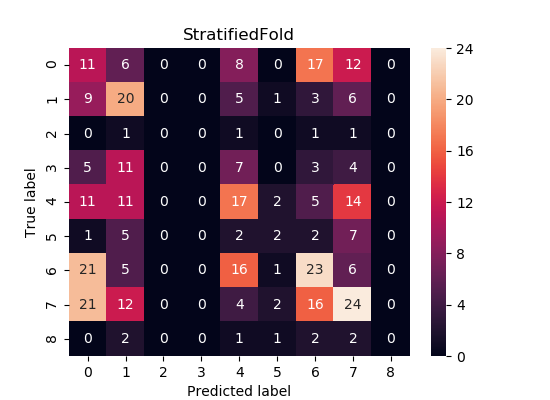

<IPython.core.display.Javascript object>


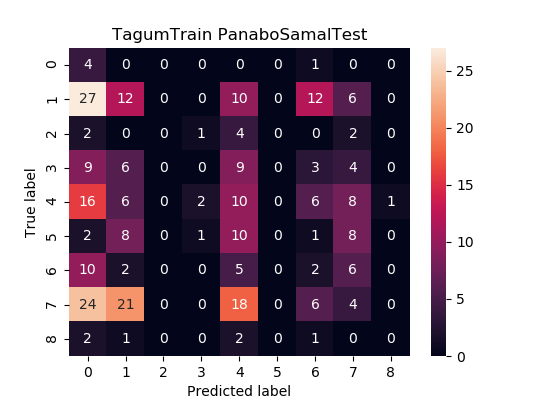

fold_1     fold_2     fold_3  \
index                                                                           
Accuracy                                      25.401070  29.569892  26.216216   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  15.555556  18.478261  13.924051   
Precision_Drug Related Incident (RA 9165)     35.714286  36.842105  27.397260   
Precision_HOMICIDE                             0.000000   0.000000   0.000000   
Precision_MURDER                               0.000000   0.000000   0.000000   
Precision_PHYSICAL INJURIES                   33.333333  33.333333  27.868852   
Precision_RAPE (Art. 266-A RC & R.A.8353)      0.000000   0.000000  22.222222   
Precision_ROBBERY                             28.767123  28.571429  31.944444   
Precision_THEFT                               24.731183  37.234043  31.578947   
Precision_Vehicular Traffic Accident           0.000000   0.000000   0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC     25.925926  31.481481  20.370370   
Recall_Drug Related Incident (RA 9165)        33.333333  47.727273  45.454545   
Recall_HOMICIDE                                0.000000   0.000000   0.000000   
Recall_MURDER                                  0.000000   0.000000   0.000000   
Recall_PHYSICAL INJURIES                      36.666667  25.000000  28.333333   
Recall_RAPE (Art. 266-A RC & R.A.8353)         0.000000   0.000000  10.526316   
Recall_ROBBERY                                28.767123  30.136986  31.944444   
Recall_THEFT                                  28.750000  43.750000  30.379747   
Recall_Vehicular Traffic Accident              0.000000   0.000000   0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC         19.444444  23.287671  16.541353   
F1_Drug Related Incident (RA 9165)            34.482759  41.584158  34.188034   
F1_HOMICIDE                                    0.000000   0.000000   0.000000   
F1_MURDER                                      0.000000   0.000000   0.000000   
F1_PHYSICAL INJURIES                          34.920635  28.571429  28.099174   
F1_RAPE (Art. 266-A RC & R.A.8353)             0.000000   0.000000  14.285714   
F1_ROBBERY                                    28.767123  29.333333  31.944444   
F1_THEFT                                      26.589595  40.229885  30.967742   
F1_Vehicular Traffic Accident                  0.000000   0.000000   0.000000   

                                                   mean  \
index                                                     
Accuracy                                      27.062393   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  15.985956   
Precision_Drug Related Incident (RA 9165)     33.317884   
Precision_HOMICIDE                             0.000000   
Precision_MURDER                               0.000000   
Precision_PHYSICAL INJURIES                   31.511840   
Precision_RAPE (Art. 266-A RC & R.A.8353)      7.407407   
Precision_ROBBERY                             29.760999   
Precision_THEFT                               31.181391   
Precision_Vehicular Traffic Accident           0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC     25.925926   
Recall_Drug Related Incident (RA 9165)        42.171717   
Recall_HOMICIDE                                0.000000   
Recall_MURDER                                  0.000000   
Recall_PHYSICAL INJURIES                      30.000000   
Recall_RAPE (Art. 266-A RC & R.A.8353)         3.508772   
Recall_ROBBERY                                30.282851   
Recall_THEFT                                  34.293249   
Recall_Vehicular Traffic Accident              0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC         19.757823   
F1_Drug Related Incident (RA 9165)            36.751650   
F1_HOMICIDE                                    0.000000   
F1_MURDER                                      0.000000   
F1_PHYSICAL INJURIES                          30.530412   
F1_RAPE (Art. 266-A RC & R.A.8353)             4.761905   
F1_ROBBERY               

In [21]:
from sklearn.neighbors import KNeighborsClassifier

evaluate_model(KNeighborsClassifier(n_neighbors=15))

### SVM

/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packag

<IPython.core.display.Javascript object>


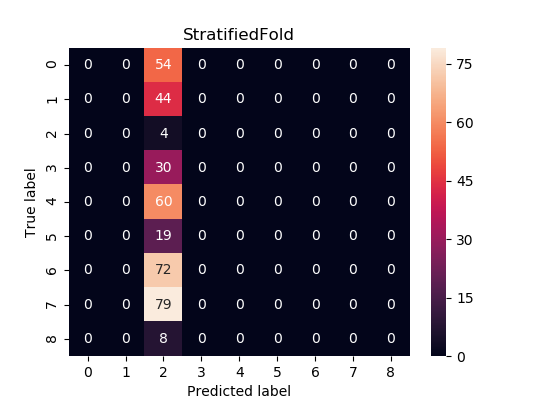

<IPython.core.display.Javascript object>


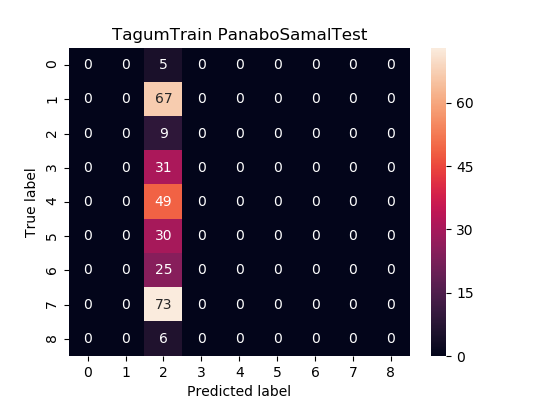

fold_1      fold_2  \
index                                                                  
Accuracy                                        1.069519   21.505376   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC    0.000000    0.000000   
Precision_Drug Related Incident (RA 9165)       0.000000    0.000000   
Precision_HOMICIDE                              1.069519    0.000000   
Precision_MURDER                                0.000000    0.000000   
Precision_PHYSICAL INJURIES                     0.000000    0.000000   
Precision_RAPE (Art. 266-A RC & R.A.8353)       0.000000    0.000000   
Precision_ROBBERY                               0.000000    0.000000   
Precision_THEFT                                 0.000000   21.505376   
Precision_Vehicular Traffic Accident            0.000000    0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC       0.000000    0.000000   
Recall_Drug Related Incident (RA 9165)          0.000000    0.000000   
Recall_HOMICIDE                               100.000000    0.000000   
Recall_MURDER                                   0.000000    0.000000   
Recall_PHYSICAL INJURIES                        0.000000    0.000000   
Recall_RAPE (Art. 266-A RC & R.A.8353)          0.000000    0.000000   
Recall_ROBBERY                                  0.000000    0.000000   
Recall_THEFT                                    0.000000  100.000000   
Recall_Vehicular Traffic Accident               0.000000    0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC           0.000000    0.000000   
F1_Drug Related Incident (RA 9165)              0.000000    0.000000   
F1_HOMICIDE                                     2.116402    0.000000   
F1_MURDER                                       0.000000    0.000000   
F1_PHYSICAL INJURIES                            0.000000    0.000000   
F1_RAPE (Art. 266-A RC & R.A.8353)              0.000000    0.000000   
F1_ROBBERY                                      0.000000    0.000000   
F1_THEFT                                        0.000000   35.398230   
F1_Vehicular Traffic Accident                   0.000000    0.000000   

                                                  fold_3       mean  \
index                                                                 
Accuracy                                        1.081081   7.885325   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC    0.000000   0.000000   
Precision_Drug Related Incident (RA 9165)       0.000000   0.000000   
Precision_HOMICIDE                              1.081081   0.716867   
Precision_MURDER                                0.000000   0.000000   
Precision_PHYSICAL INJURIES                     0.000000   0.000000   
Precision_RAPE (Art. 266-A RC & R.A.8353)       0.000000   0.000000   
Precision_ROBBERY                               0.000000   0.000000   
Precision_THEFT                                 0.000000   7.168459   
Precision_Vehicular Traffic Accident            0.000000   0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC       0.000000   0.000000   
Recall_Drug Related Incident (RA 9165)          0.000000   0.000000   
Recall_HOMICIDE                               100.000000  66.666667   
Recall_MURDER                                   0.000000   0.000000   
Recall_PHYSICAL INJURIES                        0.000000   0.000000   
Recall_RAPE (Art. 266-A RC & R.A.8353)          0.000000   0.000000   
Recall_ROBBERY                                  0.000000   0.000000   
Recall_THEFT                                    0.000000  33.333333   
Recall_Vehicular Traffic Accident               0.000000   0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC           0.000000   0.000000   
F1_Drug Related Incident (RA 9165)              0.000000   0.000000   
F1_HOMICIDE                                     2.139037   1.418480   
F1_MURDER                                       0.000000   0.000000   
F1_PHYSICAL INJURIES                            0.000000   0.000000   
F1_RAPE (Art. 266-A RC & R.A.8353)         

In [22]:
from sklearn.svm import LinearSVC
evaluate_model(LinearSVC())

/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0

<IPython.core.display.Javascript object>


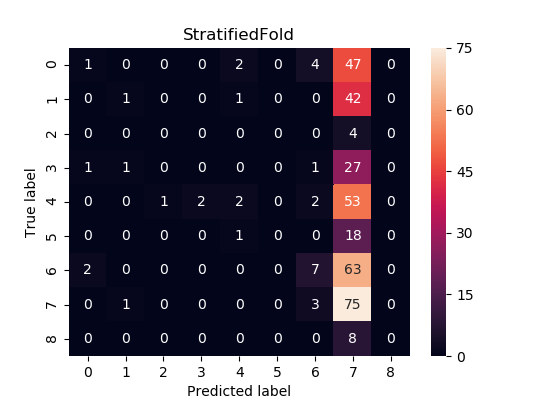

<IPython.core.display.Javascript object>


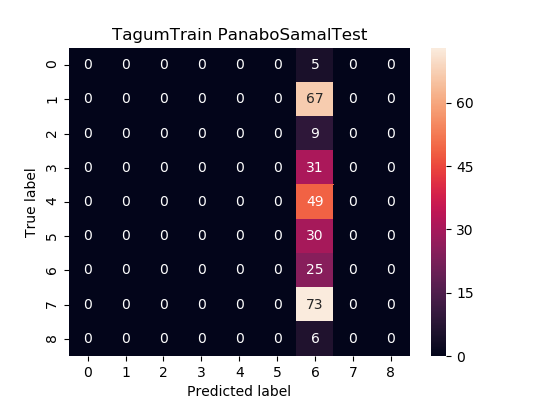

fold_1     fold_2     fold_3  \
index                                                                           
Accuracy                                      24.331551  25.806452  23.243243   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  20.000000  25.000000  25.000000   
Precision_Drug Related Incident (RA 9165)     75.000000  80.000000  33.333333   
Precision_HOMICIDE                             0.000000   0.000000   0.000000   
Precision_MURDER                               0.000000   0.000000   0.000000   
Precision_PHYSICAL INJURIES                   28.571429  33.333333  33.333333   
Precision_RAPE (Art. 266-A RC & R.A.8353)      0.000000   0.000000   0.000000   
Precision_ROBBERY                             46.153846  50.000000  41.176471   
Precision_THEFT                               22.485207  23.619632  22.255193   
Precision_Vehicular Traffic Accident           0.000000   0.000000   0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC      1.851852   3.703704   1.851852   
Recall_Drug Related Incident (RA 9165)        13.333333   9.090909   2.272727   
Recall_HOMICIDE                                0.000000   0.000000   0.000000   
Recall_MURDER                                  0.000000   0.000000   0.000000   
Recall_PHYSICAL INJURIES                       3.333333   6.666667   3.333333   
Recall_RAPE (Art. 266-A RC & R.A.8353)         0.000000   0.000000   0.000000   
Recall_ROBBERY                                 8.219178  12.328767   9.722222   
Recall_THEFT                                  95.000000  96.250000  94.936709   
Recall_Vehicular Traffic Accident              0.000000   0.000000   0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC          3.389831   6.451613   3.448276   
F1_Drug Related Incident (RA 9165)            22.641509  16.326531   4.255319   
F1_HOMICIDE                                    0.000000   0.000000   0.000000   
F1_MURDER                                      0.000000   0.000000   0.000000   
F1_PHYSICAL INJURIES                           5.970149  11.111111   6.060606   
F1_RAPE (Art. 266-A RC & R.A.8353)             0.000000   0.000000   0.000000   
F1_ROBBERY                                    13.953488  19.780220  15.730337   
F1_THEFT                                      36.363636  37.931034  36.057692   
F1_Vehicular Traffic Accident                  0.000000   0.000000   0.000000   

                                                   mean  \
index                                                     
Accuracy                                      24.460415   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  23.333333   
Precision_Drug Related Incident (RA 9165)     62.777778   
Precision_HOMICIDE                             0.000000   
Precision_MURDER                               0.000000   
Precision_PHYSICAL INJURIES                   31.746032   
Precision_RAPE (Art. 266-A RC & R.A.8353)      0.000000   
Precision_ROBBERY                             45.776772   
Precision_THEFT                               22.786677   
Precision_Vehicular Traffic Accident           0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC      2.469136   
Recall_Drug Related Incident (RA 9165)         8.232323   
Recall_HOMICIDE                                0.000000   
Recall_MURDER                                  0.000000   
Recall_PHYSICAL INJURIES                       4.444444   
Recall_RAPE (Art. 266-A RC & R.A.8353)         0.000000   
Recall_ROBBERY                                10.090056   
Recall_THEFT                                  95.395570   
Recall_Vehicular Traffic Accident              0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC          4.429906   
F1_Drug Related Incident (RA 9165)            14.407786   
F1_HOMICIDE                                    0.000000   
F1_MURDER                                      0.000000   
F1_PHYSICAL INJURIES                           7.713955   
F1_RAPE (Art. 266-A RC & R.A.8353)             0.000000   
F1_ROBBERY               

In [23]:
from sklearn.svm import SVC
evaluate_model(SVC())

In [24]:
# evaluate_model(SVC(kernel='poly',degree=1, gamma='auto'))

/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0

<IPython.core.display.Javascript object>


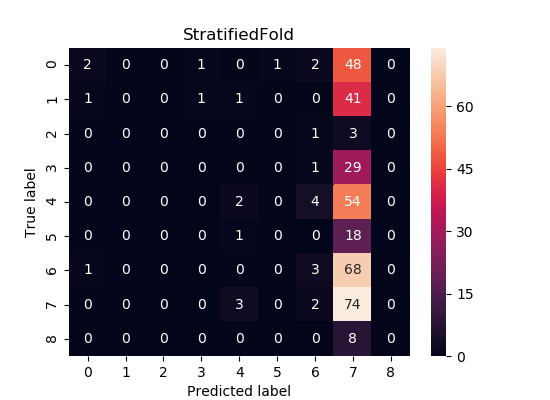

<IPython.core.display.Javascript object>


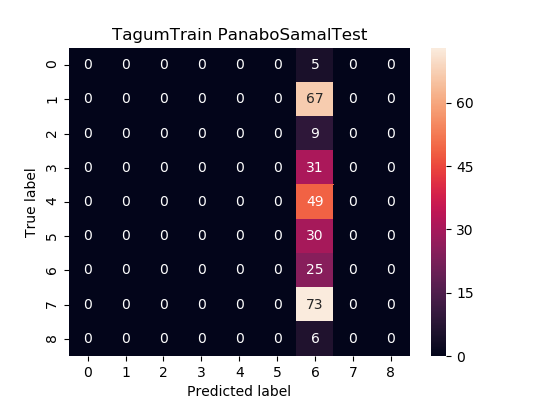

fold_1     fold_2     fold_3  \
index                                                                           
Accuracy                                      22.994652  23.118280  21.891892   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  33.333333  11.111111  50.000000   
Precision_Drug Related Incident (RA 9165)     50.000000  42.857143   0.000000   
Precision_HOMICIDE                             0.000000   0.000000   0.000000   
Precision_MURDER                               0.000000   0.000000   0.000000   
Precision_PHYSICAL INJURIES                   33.333333  20.000000  28.571429   
Precision_RAPE (Art. 266-A RC & R.A.8353)      0.000000   0.000000   0.000000   
Precision_ROBBERY                             36.363636  50.000000  23.076923   
Precision_THEFT                               21.739130  22.255193  21.574344   
Precision_Vehicular Traffic Accident           0.000000   0.000000   0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC      1.851852   1.851852   3.703704   
Recall_Drug Related Incident (RA 9165)         6.666667   6.818182   0.000000   
Recall_HOMICIDE                                0.000000   0.000000   0.000000   
Recall_MURDER                                  0.000000   0.000000   0.000000   
Recall_PHYSICAL INJURIES                       5.000000   1.666667   3.333333   
Recall_RAPE (Art. 266-A RC & R.A.8353)         0.000000   0.000000   0.000000   
Recall_ROBBERY                                 5.479452   8.219178   4.166667   
Recall_THEFT                                  93.750000  93.750000  93.670886   
Recall_Vehicular Traffic Accident              0.000000   0.000000   0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC          3.508772   3.174603   6.896552   
F1_Drug Related Incident (RA 9165)            11.764706  11.764706   0.000000   
F1_HOMICIDE                                    0.000000   0.000000   0.000000   
F1_MURDER                                      0.000000   0.000000   0.000000   
F1_PHYSICAL INJURIES                           8.695652   3.076923   5.970149   
F1_RAPE (Art. 266-A RC & R.A.8353)             0.000000   0.000000   0.000000   
F1_ROBBERY                                     9.523810  14.117647   7.058824   
F1_THEFT                                      35.294118  35.971223  35.071090   
F1_Vehicular Traffic Accident                  0.000000   0.000000   0.000000   

                                                   mean  \
index                                                     
Accuracy                                      22.668275   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  31.481481   
Precision_Drug Related Incident (RA 9165)     30.952381   
Precision_HOMICIDE                             0.000000   
Precision_MURDER                               0.000000   
Precision_PHYSICAL INJURIES                   27.301587   
Precision_RAPE (Art. 266-A RC & R.A.8353)      0.000000   
Precision_ROBBERY                             36.480186   
Precision_THEFT                               21.856222   
Precision_Vehicular Traffic Accident           0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC      2.469136   
Recall_Drug Related Incident (RA 9165)         4.494949   
Recall_HOMICIDE                                0.000000   
Recall_MURDER                                  0.000000   
Recall_PHYSICAL INJURIES                       3.333333   
Recall_RAPE (Art. 266-A RC & R.A.8353)         0.000000   
Recall_ROBBERY                                 5.955099   
Recall_THEFT                                  93.723629   
Recall_Vehicular Traffic Accident              0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC          4.526642   
F1_Drug Related Incident (RA 9165)             7.843137   
F1_HOMICIDE                                    0.000000   
F1_MURDER                                      0.000000   
F1_PHYSICAL INJURIES                           5.914242   
F1_RAPE (Art. 266-A RC & R.A.8353)             0.000000   
F1_ROBBERY               

In [25]:
evaluate_model(SVC(kernel='rbf'))

### Trees 

/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<IPython.core.display.Javascript object>


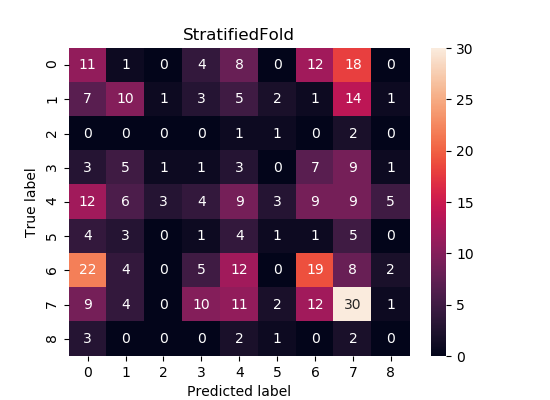

<IPython.core.display.Javascript object>


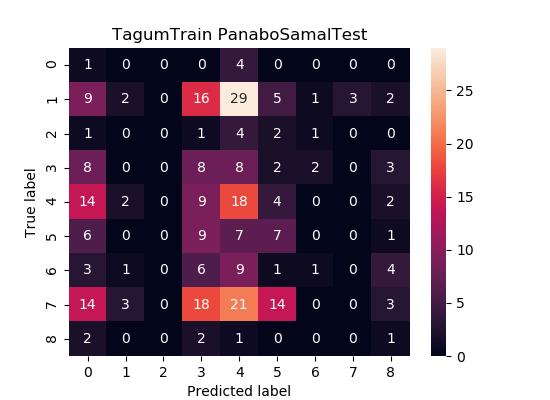

fold_1     fold_2     fold_3  \
index                                                                           
Accuracy                                      25.935829  21.236559  21.891892   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  29.032258  19.736842  15.492958   
Precision_Drug Related Incident (RA 9165)     39.583333  41.666667  30.303030   
Precision_HOMICIDE                             0.000000   0.000000   0.000000   
Precision_MURDER                              11.538462   9.523810   3.571429   
Precision_PHYSICAL INJURIES                   17.808219  10.526316  16.363636   
Precision_RAPE (Art. 266-A RC & R.A.8353)      9.523810   9.090909  10.000000   
Precision_ROBBERY                             26.315789  22.784810  31.147541   
Precision_THEFT                               38.596491  29.411765  30.927835   
Precision_Vehicular Traffic Accident           0.000000  10.000000   0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC     33.333333  27.777778  20.370370   
Recall_Drug Related Incident (RA 9165)        42.222222  34.090909  22.727273   
Recall_HOMICIDE                                0.000000   0.000000   0.000000   
Recall_MURDER                                  9.677419   6.666667   3.333333   
Recall_PHYSICAL INJURIES                      21.666667  10.000000  15.000000   
Recall_RAPE (Art. 266-A RC & R.A.8353)        10.526316  10.526316   5.263158   
Recall_ROBBERY                                27.397260  24.657534  26.388889   
Recall_THEFT                                  27.500000  25.000000  37.974684   
Recall_Vehicular Traffic Accident              0.000000  12.500000   0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC         31.034483  23.076923  17.600000   
F1_Drug Related Incident (RA 9165)            40.860215  37.500000  25.974026   
F1_HOMICIDE                                    0.000000   0.000000   0.000000   
F1_MURDER                                     10.526316   7.843137   3.448276   
F1_PHYSICAL INJURIES                          19.548872  10.256410  15.652174   
F1_RAPE (Art. 266-A RC & R.A.8353)            10.000000   9.756098   6.896552   
F1_ROBBERY                                    26.845638  23.684211  28.571429   
F1_THEFT                                      32.116788  27.027027  34.090909   
F1_Vehicular Traffic Accident                  0.000000  11.111111   0.000000   

                                                   mean  \
index                                                     
Accuracy                                      23.021427   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  21.420686   
Precision_Drug Related Incident (RA 9165)     37.184343   
Precision_HOMICIDE                             0.000000   
Precision_MURDER                               8.211233   
Precision_PHYSICAL INJURIES                   14.899390   
Precision_RAPE (Art. 266-A RC & R.A.8353)      9.538240   
Precision_ROBBERY                             26.749380   
Precision_THEFT                               32.978697   
Precision_Vehicular Traffic Accident           3.333333   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC     27.160494   
Recall_Drug Related Incident (RA 9165)        33.013468   
Recall_HOMICIDE                                0.000000   
Recall_MURDER                                  6.559140   
Recall_PHYSICAL INJURIES                      15.555556   
Recall_RAPE (Art. 266-A RC & R.A.8353)         8.771930   
Recall_ROBBERY                                26.147894   
Recall_THEFT                                  30.158228   
Recall_Vehicular Traffic Accident              4.166667   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC         23.903802   
F1_Drug Related Incident (RA 9165)            34.778080   
F1_HOMICIDE                                    0.000000   
F1_MURDER                                      7.272576   
F1_PHYSICAL INJURIES                          15.152485   
F1_RAPE (Art. 266-A RC & R.A.8353)             8.884216   
F1_ROBBERY               

In [26]:
from sklearn.tree import DecisionTreeClassifier

evaluate_model(DecisionTreeClassifier())

/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, wa

<IPython.core.display.Javascript object>


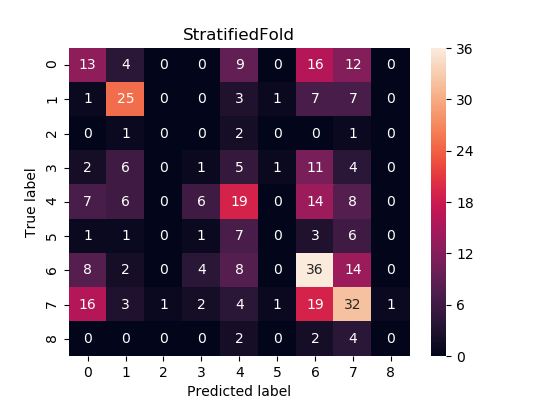

<IPython.core.display.Javascript object>


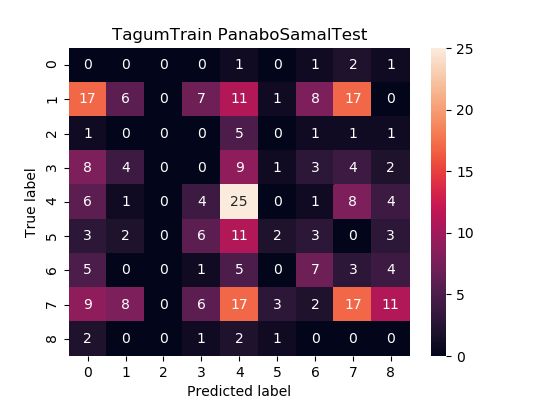

fold_1     fold_2     fold_3  \
index                                                                           
Accuracy                                      27.540107  28.225806  34.054054   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  22.000000  24.137931  27.083333   
Precision_Drug Related Incident (RA 9165)     43.478261  44.897959  52.083333   
Precision_HOMICIDE                            50.000000   0.000000   0.000000   
Precision_MURDER                               0.000000   8.333333   7.142857   
Precision_PHYSICAL INJURIES                   12.727273  18.181818  32.203390   
Precision_RAPE (Art. 266-A RC & R.A.8353)      7.142857   0.000000   0.000000   
Precision_ROBBERY                             31.250000  26.530612  33.333333   
Precision_THEFT                               34.234234  35.955056  36.363636   
Precision_Vehicular Traffic Accident           0.000000   0.000000   0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC     20.370370  25.925926  24.074074   
Recall_Drug Related Incident (RA 9165)        44.444444  50.000000  56.818182   
Recall_HOMICIDE                               25.000000   0.000000   0.000000   
Recall_MURDER                                  0.000000   3.333333   3.333333   
Recall_PHYSICAL INJURIES                      11.666667  16.666667  31.666667   
Recall_RAPE (Art. 266-A RC & R.A.8353)         5.263158   0.000000   0.000000   
Recall_ROBBERY                                34.246575  35.616438  50.000000   
Recall_THEFT                                  47.500000  40.000000  40.506329   
Recall_Vehicular Traffic Accident              0.000000   0.000000   0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC         21.153846  25.000000  25.490196   
F1_Drug Related Incident (RA 9165)            43.956044  47.311828  54.347826   
F1_HOMICIDE                                   33.333333   0.000000   0.000000   
F1_MURDER                                      0.000000   4.761905   4.545455   
F1_PHYSICAL INJURIES                          12.173913  17.391304  31.932773   
F1_RAPE (Art. 266-A RC & R.A.8353)             6.060606   0.000000   0.000000   
F1_ROBBERY                                    32.679739  30.409357  40.000000   
F1_THEFT                                      39.790576  37.869822  38.323353   
F1_Vehicular Traffic Accident                  0.000000   0.000000   0.000000   

                                                   mean  \
index                                                     
Accuracy                                      29.939989   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  24.407088   
Precision_Drug Related Incident (RA 9165)     46.819851   
Precision_HOMICIDE                            16.666667   
Precision_MURDER                               5.158730   
Precision_PHYSICAL INJURIES                   21.037494   
Precision_RAPE (Art. 266-A RC & R.A.8353)      2.380952   
Precision_ROBBERY                             30.371315   
Precision_THEFT                               35.517642   
Precision_Vehicular Traffic Accident           0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC     23.456790   
Recall_Drug Related Incident (RA 9165)        50.420875   
Recall_HOMICIDE                                8.333333   
Recall_MURDER                                  2.222222   
Recall_PHYSICAL INJURIES                      20.000000   
Recall_RAPE (Art. 266-A RC & R.A.8353)         1.754386   
Recall_ROBBERY                                39.954338   
Recall_THEFT                                  42.668776   
Recall_Vehicular Traffic Accident              0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC         23.881347   
F1_Drug Related Incident (RA 9165)            48.538566   
F1_HOMICIDE                                   11.111111   
F1_MURDER                                      3.102453   
F1_PHYSICAL INJURIES                          20.499330   
F1_RAPE (Art. 266-A RC & R.A.8353)             2.020202   
F1_ROBBERY               

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
evaluate_model(rfc)

<IPython.core.display.Javascript object>


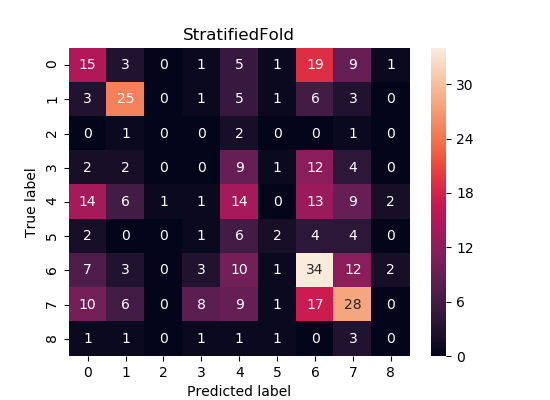

<IPython.core.display.Javascript object>


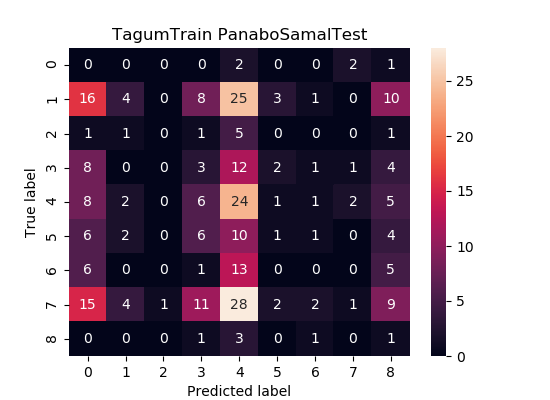

fold_1      fold_2  \
index                                                                 
Accuracy                                      33.422460   31.720430   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  16.981132   29.411765   
Precision_Drug Related Incident (RA 9165)     53.703704   34.782609   
Precision_HOMICIDE                            16.666667  100.000000   
Precision_MURDER                               0.000000   11.764706   
Precision_PHYSICAL INJURIES                   26.923077   32.142857   
Precision_RAPE (Art. 266-A RC & R.A.8353)     14.285714    0.000000   
Precision_ROBBERY                             38.709677   31.168831   
Precision_THEFT                               41.666667   36.607143   
Precision_Vehicular Traffic Accident           0.000000   33.333333   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC     16.666667   27.777778   
Recall_Drug Related Incident (RA 9165)        64.444444   36.363636   
Recall_HOMICIDE                               25.000000   25.000000   
Recall_MURDER                                  0.000000    6.666667   
Recall_PHYSICAL INJURIES                      35.000000   30.000000   
Recall_RAPE (Art. 266-A RC & R.A.8353)         5.263158    0.000000   
Recall_ROBBERY                                32.876712   32.876712   
Recall_THEFT                                  50.000000   51.250000   
Recall_Vehicular Traffic Accident              0.000000   12.500000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC         16.822430   28.571429   
F1_Drug Related Incident (RA 9165)            58.585859   35.555556   
F1_HOMICIDE                                   20.000000   40.000000   
F1_MURDER                                      0.000000    8.510638   
F1_PHYSICAL INJURIES                          30.434783   31.034483   
F1_RAPE (Art. 266-A RC & R.A.8353)             7.692308    0.000000   
F1_ROBBERY                                    35.555556   32.000000   
F1_THEFT                                      45.454545   42.708333   
F1_Vehicular Traffic Accident                  0.000000   18.181818   

                                                 fold_3       mean  \
index                                                                
Accuracy                                      31.891892  32.344927   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  27.777778  24.723558   
Precision_Drug Related Incident (RA 9165)     53.191489  47.225934   
Precision_HOMICIDE                             0.000000  38.888889   
Precision_MURDER                               0.000000   3.921569   
Precision_PHYSICAL INJURIES                   22.950820  27.338918   
Precision_RAPE (Art. 266-A RC & R.A.8353)     25.000000  13.095238   
Precision_ROBBERY                             32.380952  34.086487   
Precision_THEFT                               38.356164  38.876658   
Precision_Vehicular Traffic Accident           0.000000  11.111111   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC     27.777778  24.074074   
Recall_Drug Related Incident (RA 9165)        56.818182  52.542088   
Recall_HOMICIDE                                0.000000  16.666667   
Recall_MURDER                                  0.000000   2.222222   
Recall_PHYSICAL INJURIES                      23.333333  29.444444   
Recall_RAPE (Art. 266-A RC & R.A.8353)        10.526316   5.263158   
Recall_ROBBERY                                47.222222  37.658549   
Recall_THEFT                                  35.443038  45.564346   
Recall_Vehicular Traffic Accident              0.000000   4.166667   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC         27.777778  24.390545   
F1_Drug Related Incident (RA 9165)            54.945055  49.695490   
F1_HOMICIDE                                    0.000000  20.000000   
F1_MURDER                                      0.000000   2.836879   
F1_PHYSICAL INJURIES                          23.140496  28.203254   
F1_RAPE (Art. 266-A RC & R.A.8353)            14.814815   7.502374   
F1_ROBBERY                  

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
evaluate_model(GradientBoostingClassifier())

### Naive Bayes 

/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, wa

<IPython.core.display.Javascript object>


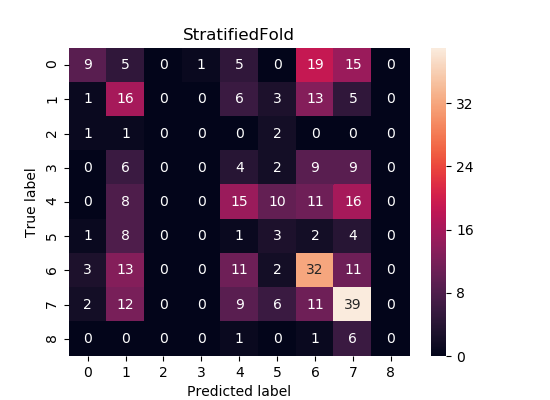

<IPython.core.display.Javascript object>


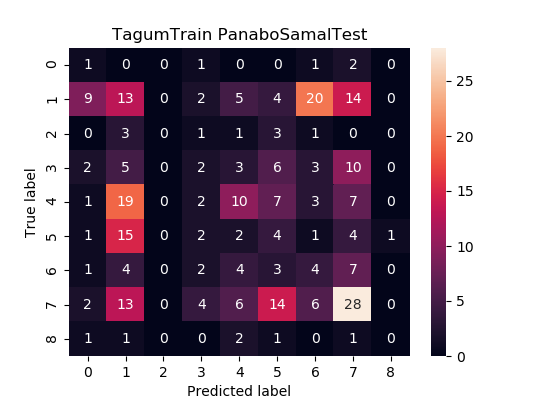

fold_1     fold_2     fold_3  \
index                                                                           
Accuracy                                      29.946524  30.913978  30.810811   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  27.272727  28.947368  52.941176   
Precision_Drug Related Incident (RA 9165)     28.947368  26.666667  23.188406   
Precision_HOMICIDE                             0.000000   0.000000   0.000000   
Precision_MURDER                               0.000000   0.000000   0.000000   
Precision_PHYSICAL INJURIES                   23.333333  29.729730  28.846154   
Precision_RAPE (Art. 266-A RC & R.A.8353)     20.689655  20.000000  10.714286   
Precision_ROBBERY                             33.673469  28.000000  32.653061   
Precision_THEFT                               35.632184  41.414141  37.142857   
Precision_Vehicular Traffic Accident           0.000000   0.000000   0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC     11.111111  20.370370  16.666667   
Recall_Drug Related Incident (RA 9165)        48.888889  27.272727  36.363636   
Recall_HOMICIDE                                0.000000   0.000000   0.000000   
Recall_MURDER                                  0.000000   0.000000   0.000000   
Recall_PHYSICAL INJURIES                      23.333333  18.333333  25.000000   
Recall_RAPE (Art. 266-A RC & R.A.8353)        31.578947  26.315789  15.789474   
Recall_ROBBERY                                45.205479  47.945205  44.444444   
Recall_THEFT                                  38.750000  51.250000  49.367089   
Recall_Vehicular Traffic Accident              0.000000   0.000000   0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC         15.789474  23.913043  25.352113   
F1_Drug Related Incident (RA 9165)            36.363636  26.966292  28.318584   
F1_HOMICIDE                                    0.000000   0.000000   0.000000   
F1_MURDER                                      0.000000   0.000000   0.000000   
F1_PHYSICAL INJURIES                          23.333333  22.680412  26.785714   
F1_RAPE (Art. 266-A RC & R.A.8353)            25.000000  22.727273  12.765957   
F1_ROBBERY                                    38.596491  35.353535  37.647059   
F1_THEFT                                      37.125749  45.810056  42.391304   
F1_Vehicular Traffic Accident                  0.000000   0.000000   0.000000   

                                                   mean  \
index                                                     
Accuracy                                      30.557104   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  36.387091   
Precision_Drug Related Incident (RA 9165)     26.267480   
Precision_HOMICIDE                             0.000000   
Precision_MURDER                               0.000000   
Precision_PHYSICAL INJURIES                   27.303072   
Precision_RAPE (Art. 266-A RC & R.A.8353)     17.134647   
Precision_ROBBERY                             31.442177   
Precision_THEFT                               38.063061   
Precision_Vehicular Traffic Accident           0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC     16.049383   
Recall_Drug Related Incident (RA 9165)        37.508418   
Recall_HOMICIDE                                0.000000   
Recall_MURDER                                  0.000000   
Recall_PHYSICAL INJURIES                      22.222222   
Recall_RAPE (Art. 266-A RC & R.A.8353)        24.561404   
Recall_ROBBERY                                45.865043   
Recall_THEFT                                  46.455696   
Recall_Vehicular Traffic Accident              0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC         21.684877   
F1_Drug Related Incident (RA 9165)            30.549504   
F1_HOMICIDE                                    0.000000   
F1_MURDER                                      0.000000   
F1_PHYSICAL INJURIES                          24.266487   
F1_RAPE (Art. 266-A RC & R.A.8353)            20.164410   
F1_ROBBERY               

In [29]:
from sklearn.naive_bayes import BernoulliNB
evaluate_model(BernoulliNB())

/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<IPython.core.display.Javascript object>


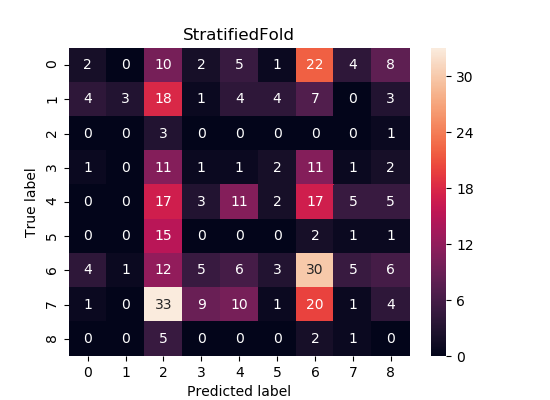

<IPython.core.display.Javascript object>


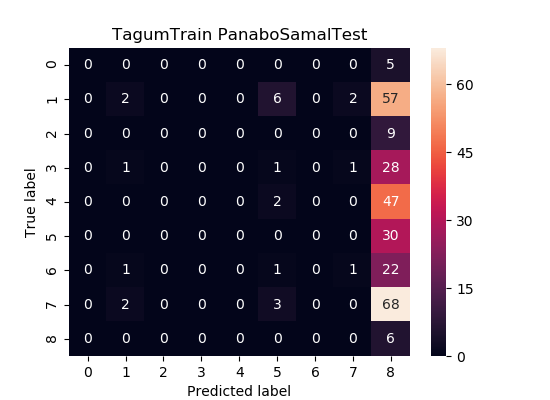

fold_1     fold_2     fold_3  \
index                                                                           
Accuracy                                      17.647059  17.204301  13.783784   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC   0.000000  40.000000  16.666667   
Precision_Drug Related Incident (RA 9165)     34.615385  44.444444  75.000000   
Precision_HOMICIDE                             0.000000   2.272727   2.419355   
Precision_MURDER                              12.500000  38.461538   4.761905   
Precision_PHYSICAL INJURIES                   18.750000  10.000000  29.729730   
Precision_RAPE (Art. 266-A RC & R.A.8353)      6.349206   3.703704   0.000000   
Precision_ROBBERY                             33.333333  34.782609  27.027027   
Precision_THEFT                               25.581395  35.000000   5.555556   
Precision_Vehicular Traffic Accident           0.000000   0.000000   0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC      0.000000   3.703704   3.703704   
Recall_Drug Related Incident (RA 9165)        20.000000   9.090909   6.818182   
Recall_HOMICIDE                                0.000000  75.000000  75.000000   
Recall_MURDER                                  6.451613  16.666667   3.333333   
Recall_PHYSICAL INJURIES                       5.000000   3.333333  18.333333   
Recall_RAPE (Art. 266-A RC & R.A.8353)        42.105263  10.526316   0.000000   
Recall_ROBBERY                                45.205479  43.835616  41.666667   
Recall_THEFT                                  13.750000  17.500000   1.265823   
Recall_Vehicular Traffic Accident              0.000000   0.000000   0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC          0.000000   6.779661   6.060606   
F1_Drug Related Incident (RA 9165)            25.352113  15.094340  12.500000   
F1_HOMICIDE                                    0.000000   4.411765   4.687500   
F1_MURDER                                      8.510638  23.255814   3.921569   
F1_PHYSICAL INJURIES                           7.894737   5.000000  22.680412   
F1_RAPE (Art. 266-A RC & R.A.8353)            11.034483   5.479452   0.000000   
F1_ROBBERY                                    38.372093  38.787879  32.786885   
F1_THEFT                                      17.886179  23.333333   2.061856   
F1_Vehicular Traffic Accident                  0.000000   0.000000   0.000000   

                                                   mean  \
index                                                     
Accuracy                                      16.211715   
Precision_ANTI-CARNAPPING ACT (R.A. 6539) MC  18.888889   
Precision_Drug Related Incident (RA 9165)     51.353276   
Precision_HOMICIDE                             1.564027   
Precision_MURDER                              18.574481   
Precision_PHYSICAL INJURIES                   19.493243   
Precision_RAPE (Art. 266-A RC & R.A.8353)      3.350970   
Precision_ROBBERY                             31.714323   
Precision_THEFT                               22.045650   
Precision_Vehicular Traffic Accident           0.000000   
Recall_ANTI-CARNAPPING ACT (R.A. 6539) MC      2.469136   
Recall_Drug Related Incident (RA 9165)        11.969697   
Recall_HOMICIDE                               50.000000   
Recall_MURDER                                  8.817204   
Recall_PHYSICAL INJURIES                       8.888889   
Recall_RAPE (Art. 266-A RC & R.A.8353)        17.543860   
Recall_ROBBERY                                43.569254   
Recall_THEFT                                  10.838608   
Recall_Vehicular Traffic Accident              0.000000   
F1_ANTI-CARNAPPING ACT (R.A. 6539) MC          4.280089   
F1_Drug Related Incident (RA 9165)            17.648817   
F1_HOMICIDE                                    3.033088   
F1_MURDER                                     11.896007   
F1_PHYSICAL INJURIES                          11.858383   
F1_RAPE (Art. 266-A RC & R.A.8353)             5.504645   
F1_ROBBERY               

In [30]:
from sklearn.naive_bayes import MultinomialNB
evaluate_model(MultinomialNB())

In [31]:
from sklearn.externals import joblib
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
X = crime[independent_columns]
y = crime['crime_label']
rfc.fit(X, y)
joblib.dump(rfc, 'randomforest_dangerpredict_model.pkl')

['randomforest_dangerpredict_model.pkl']